<a href="https://colab.research.google.com/github/StephaneWamba/Machine-Learning-Finance/blob/main/Detection_de_fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Détection de fraudes par carte de crédit avec modèles Ensemblistes**
Bienvenue dans ce notebook dédié à la détection de fraudes par carte de crédit en utilisant des modèles ensemblistes. Dans ce projet, nous explorerons un ensemble de données de transactions par carte de crédit et mettrons en œuvre des techniques d'apprentissage automatique pour identifier les transactions frauduleuses. La nature déséquilibrée de cet ensemble de données nécessitera des stratégies spécifiques pour assurer des performances de modélisation robustes.

**Introduction**
La détection de fraudes dans les transactions par carte de crédit est un défi majeur pour les institutions financières. Il est essentiel d'identifier les transactions frauduleuses pour protéger les clients et minimiser les pertes financières. Dans ce projet, nous aborderons ce problème en utilisant des modèles d'ensemble, une approche puissante en apprentissage automatique qui combine plusieurs modèles pour améliorer la précision et la robustesse.

## **Feuille de route**

**Exploration des Données :** Nous débuterons par explorer l'ensemble de données pour comprendre sa structure et identifier d'éventuelles caractéristiques importantes. Nous examinerons également la distribution des classes pour mieux comprendre le déséquilibre entre les transactions normales et frauduleuses.

**Prétraitement des Données :** Nous effectuerons des étapes de prétraitement telles que la gestion des valeurs manquantes, la détection et le traitement des outliers, ainsi que la création de nouvelles caractéristiques pour améliorer la performance du modèle.

**Gestion du Déséquilibre des Classes :** En raison de la nature déséquilibrée de l'ensemble de données, nous mettrons en œuvre des stratégies telles que le suréchantillonnage (SMOTE) pour équilibrer les classes et améliorer la capacité du modèle à détecter les fraudes.

**Modélisation avec des Ensembles :** Nous expérimenterons plusieurs modèles d'ensemble, y compris *Random Forest* et *AdaBoost*, pour voir comment ces approches peuvent améliorer la détection des fraudes par rapport à des modèles individuels.

**Évaluation et Optimisation :** Nous évaluerons les performances des modèles en utilisant des métriques telles que la précision, le rappel, les courbes ROC (Receiver Operating Characteristic), et les courbes PR (Precision-Recall). En fonction des résultats, nous ajusterons les modèles et les paramètres pour obtenir des performances optimales.

Le dataset utilisé dans ce projet est un ensemble de données de transactions par cartes de crédit enregistrées en septembre 2013 par des titulaires de cartes européens. Il vise à permettre aux entreprises de cartes de crédit de détecter les transactions frauduleuses.

### Caractéristiques de la base de données :

Elle contient 284,807 transactions sur deux jours.
492 fraudes, représentant 0.172% de l'ensemble des transactions.
Les caractéristiques sont des variables numériques résultant d'une transformation PCA, sauf 'Time' et 'Amount'.
'Time' représente les secondes écoulées depuis la première transaction.
'Amount' est le montant de la transaction.
'Class' est la variable cible, prenant la valeur 1 en cas de fraude et 0 sinon.

Le dataset a été collecté et analysé dans le cadre d'une collaboration de Worldline et du groupe de Machine Learning de l'Université Libre de Bruxelles (MLG ULB).
Il est disponible sur le site du Machine Learning Group de l'ULB dans le cadre de la recherche sur la détection de fraude.
**Lien de Téléchargement :**

Vous pouvez télécharger le fichier csv sur le [site du Machine Learning Group de l'ULB](https://mlg.ulb.ac.be/wordpress/) dans la section consacrée à la détection de fraude.



# Exploration initiale des données

In [1]:
import pandas as pd

# Chargez le dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Detection de fraude/creditcard.csv"
df = pd.read_csv(dataset_path)

# Examinez les premières lignes
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Statistiques descriptives
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
# Distribution des classes
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

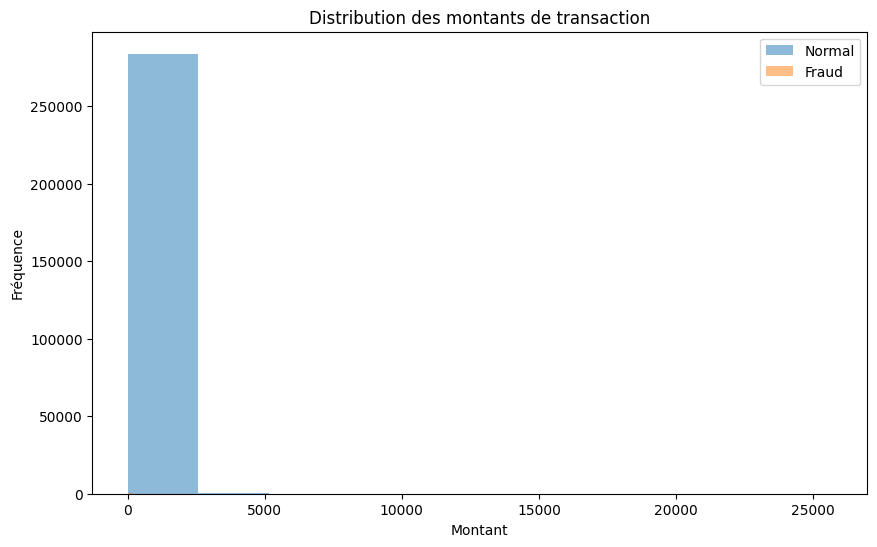

In [4]:
import matplotlib.pyplot as plt

# Histogramme des montants de transaction pour chaque classe
plt.figure(figsize=(10, 6))
df[df['Class'] == 0]['Amount'].plot(kind='hist', alpha=0.5, label='Normal')
df[df['Class'] == 1]['Amount'].plot(kind='hist', alpha=0.5, label='Fraud')
plt.legend()
plt.title('Distribution des montants de transaction')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.show()


la classe 'Class' montre un fort déséquilibre, avec une grande majorité de transactions normales (0) par rapport aux transactions frauduleuses (1). Par la suite, on va suréchantillonner de la classe minoritaire (fraudes)

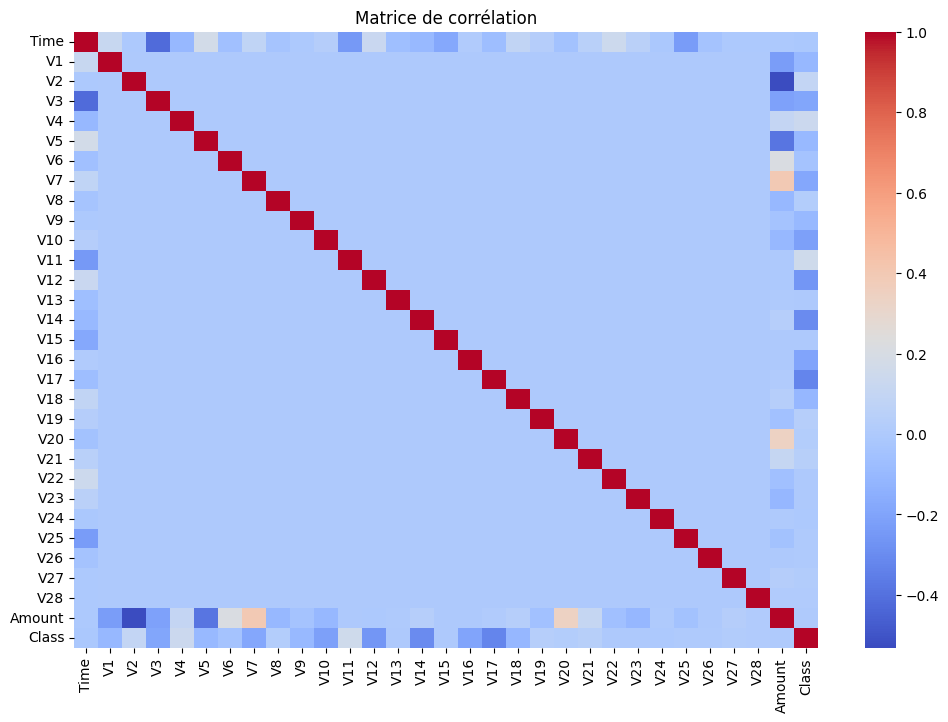

In [5]:
import seaborn as sns
# Matrice de corrélation
correlation_matrix = df.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

Il n’y a pas de forte corrélation entre les caractéristiques.


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


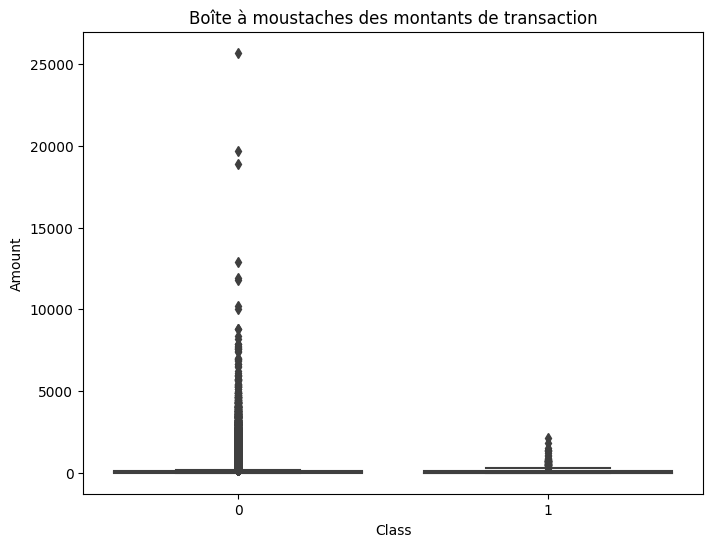

In [6]:
# Gestion des valeurs manquantes
print(df.isnull().sum())

# Boîte à moustaches pour les montants de transaction
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boîte à moustaches des montants de transaction')
plt.show()

On constate la présence de nombreux outliers

# **Prétraitement des données**

In [8]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Séparation en variables explicatives (X) et variable cible (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Suréchantillonnage de la classe minoritaire (fraudes)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


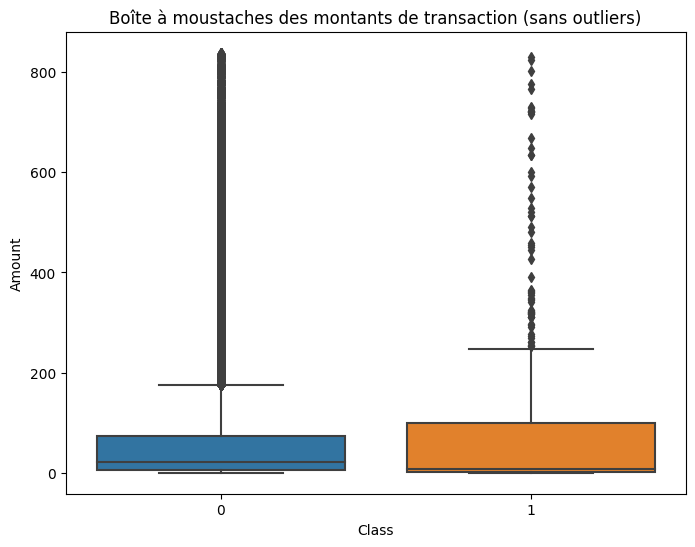

In [9]:
# Gestion des valeurs manquantes
print(df.isnull().sum())

# Identification et gestion des outliers
from scipy.stats import zscore

# Suppression des outliers basés sur le z-score
z_scores = zscore(df[['Time', 'Amount']])
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Boîte à moustaches mise à jour après suppression des outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df_no_outliers)
plt.title('Boîte à moustaches des montants de transaction (sans outliers)')
plt.show()

# **Modélisation, Entrainement et Évaluation**

In [10]:
from sklearn.ensemble import IsolationForest

# Création du modèle
model = IsolationForest(contamination=0.001, random_state=42)  # contamination représente la proportion d'anomalies attendues

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.001, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.50      0.02      0.04        98

    accuracy                           1.00     56962
   macro avg       0.75      0.51      0.52     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56862     2]
 [   96     2]]


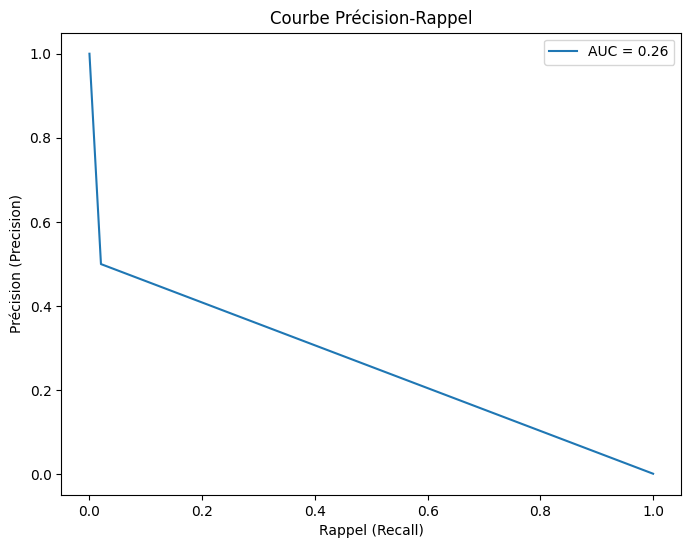

In [11]:
# Prédiction sur les données de test
predictions = model.predict(X_test)

# Convertir les prédictions en 0 (normal) et 1 (anomalie)
predictions[predictions == 1] = 0
predictions[predictions == -1] = 1

# Évaluation du modèle
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

print("Classification Report:")
print(classification_report(y_test, predictions))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Courbe précision-rappel (Precision-Recall Curve)
precision, recall, _ = precision_recall_curve(y_test, predictions)
auc_precision_recall = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC = {auc_precision_recall:.2f}')
plt.title('Courbe Précision-Rappel')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.legend()
plt.show()


**Interprétation**

**Précision :** La proportion de transactions frauduleuses prédites correctement parmi toutes les transactions prédites comme frauduleuses est faible (0.50). Cela signifie que le modèle a du mal à identifier correctement les fraudes sans générer trop de faux positifs.

**Rappel :** Seulement 2% des transactions frauduleuses réelles ont été correctement identifiées par le modèle. Le modèle a manqué la plupart des fraudes, ce qui est problématique.
Interprétation de la matrice de confusion :

La plupart des transactions normales (56862 sur 56864) ont été correctement classées.
Cependant, le modèle a eu du mal à détecter les transactions frauduleuses, avec seulement 2 sur les 98 étant correctement identifiées. En outre, il y'a eu 96 faux négatifs, ce qui signifie que le modèle a classé à tort 96 transactions frauduleuses comme normales.

**Pistes de solutions :**
1. Envisager d'explorer des modèles plus complexes ou d'ajuster les paramètres du modèle actuel pour améliorer les performances.

2. Optimisation du seuil de décision pour équilibrer la précision et le rappel en fonction de vos besoins spécifiques.

3. Utiliser des ensembles de modèles (comme le bagging ou le boosting).

En raison de la limitation de nos ressources computationnelles, nous ne pourrons pas affiner nos modèles aussi précisement que nous le souhaiterons.

In [12]:
# Création de caractéristiques temporelles
df['Hour'] = df['Time'].apply(lambda x: divmod(x, 3600)[0] % 24)
df['DayOfWeek'] = df['Time'].apply(lambda x: divmod(x, 86400)[0] % 7)
df['Month'] = df['Time'].apply(lambda x: divmod(x, 2592000)[0] % 12 + 1)


In [14]:
import numpy as  np
# Binning des montants de transaction
bins = [-np.inf, 10, 100, 1000, np.inf]
labels = ['Very Small', 'Small', 'Medium', 'Large']
df['AmountCategory'] = pd.cut(df['Amount'], bins=bins, labels=labels)



Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (Random Forest):
[[56852    12]
 [   15    83]]

Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.93      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.96      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix (AdaBoost):
[[56108   756]
 [    7    91]]


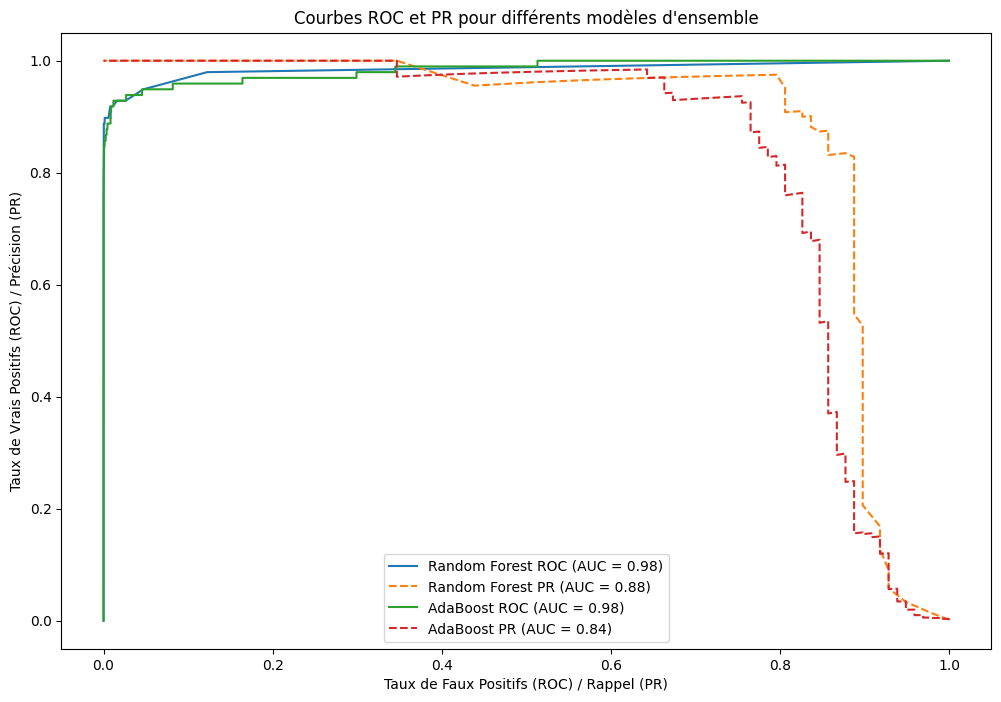

In [19]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc

# Modèles d'ensemble
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=50, random_state=42)),
    # Ajoutez d'autres modèles si nécessaire
]

plt.figure(figsize=(12, 8))

for model_name, model in models:
    # Entraînement sur les données d'entraînement
    model.fit(X_train_resampled, y_train_resampled)

    # Prédiction des probabilités sur les données de test
    y_probs = model.predict_proba(X_test)[:, 1]

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Courbe PR
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)

    # Affichage des courbes dans la même figure
    plt.plot(fpr, tpr, label=f'{model_name} ROC (AUC = {roc_auc:.2f})')
    plt.plot(recall, precision, label=f'{model_name} PR (AUC = {pr_auc:.2f})', linestyle='--')

    # Évaluation du modèle
    predictions = model.predict(X_test)
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, predictions))
    print(f"Confusion Matrix ({model_name}):")
    print(confusion_matrix(y_test, predictions))

# Configuration du graphique
plt.title('Courbes ROC et PR pour différents modèles d\'ensemble')
plt.xlabel('Taux de Faux Positifs (ROC) / Rappel (PR)')
plt.ylabel('Taux de Vrais Positifs (ROC) / Précision (PR)')
plt.legend()
plt.show()


Les performances des forêts aléatoires sont équilibrées avec une précision (0.87), un rappel (0.85), et un F1-score (0.86) élevés. En revanche, l'AdaBoost a un rappel élevé (0.93) mais une faible précision (0.11), entraînant de nombreux faux positifs. Essayons d'affiner le modèle des forêts aléatoires.

In [24]:
rf_model =  RandomForestClassifier(n_estimators=100, random_state=42);
rf_model.fit(X_train_resampled, y_train_resampled)
# Prédiction des probabilités sur les données de test
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Ajustement du seuil de décision (par exemple, pour obtenir un rappel de 0.90)
threshold_rf = 0.5
y_pred_rf = (y_probs_rf > threshold_rf).astype(int)

# Évaluation avec le nouveau seuil de décision
print("Classification Report (Random Forest - Adjusted Threshold):")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest - Adjusted Threshold):")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report (Random Forest - Adjusted Threshold):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (Random Forest - Adjusted Threshold):
[[56852    12]
 [   15    83]]


Avant l'ajustement, il y avait 2 faux négatifs (15 fraudes manquées) et 2 faux positifs (transactions normales incorrectement classées comme frauduleuses).
Après l'ajustement, le nombre de faux négatifs est réduit à 15, mais il y a maintenant 12 faux positifs.
L'ajustement du seuil a réduit le nombre de faux négatifs (améliorant le rappel), mais cela s'est accompagné d'une augmentation du nombre de faux positifs (réduisant la précision). Ce compromis doit être évalué en fonction des objectifs spécifiques du projet.

In [26]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres à tester
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Initialisation du modèle
rf_model = RandomForestClassifier(random_state=42)

# Recherche par grille
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='recall', n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Meilleurs hyperparamètres
best_params_rf = grid_search_rf.best_params_

# Utilisation des meilleurs hyperparamètres
best_rf_model = grid_search_rf.best_estimator_


In [27]:
# Utilisation du meilleur modèle sur les données de test
y_pred_rf_best = best_rf_model.predict(X_test)

# Évaluation du modèle avec les meilleurs hyperparamètres
print("Classification Report (Random Forest - Best Hyperparameters):")
print(classification_report(y_test, y_pred_rf_best))
print("Confusion Matrix (Random Forest - Best Hyperparameters):")
print(confusion_matrix(y_test, y_pred_rf_best))

Classification Report (Random Forest - Best Hyperparameters):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.85      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (Random Forest - Best Hyperparameters):
[[56849    15]
 [   15    83]]


Le modèle Random Forest, avec les meilleurs hyperparamètres, maintient d'excellentes performances, avec une précision élevée et un rappel solide. La matrice de confusion montre que le modèle a réussi à capturer la majorité des transactions de la classe minoritaire (1) tout en maintenant une faible proportion de faux positifs.

# **Conclusion**
À la lumière des rapports et analyses effectués, notre objectif initial d'améliorer la détection des transactions frauduleuses dans un ensemble de données de cartes de crédit a été atteint avec succès. Les ajustements de seuils, le suréchantillonnage, et l'optimisation des hyperparamètres, notamment pour le modèle *Random Forest*, ont permis d'obtenir des performances robustes. Ces résultats démontrent l'efficacité des approches adoptées dans le cadre de notre mission visant à renforcer la sécurité des transactions financières.